In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
df1 = pd.read_csv('/content/drive/MyDrive/data_nutrisi.csv')
df2 = pd.read_csv('/content/drive/MyDrive/data_nutrisi2.csv')

In [ ]:
df = pd.concat([df1, df2], ignore_index=True)

In [ ]:
df.head()

,food,Caloric Value,Fat,Saturated Fats,Carbohydrates,Protein,Dietary Fiber,Cholesterol
0,cream cheese,51.0,5.0,2.9,0.8,0.9,0.0,14.6
1,neufchatel cheese,215.0,19.4,10.9,3.1,7.8,0.0,62.9
2,requeijao cremoso light catupiry,49.0,3.6,2.3,0.9,0.8,0.1,0.0
3,ricotta cheese,30.0,2.0,1.3,1.5,1.5,0.0,9.8
4,cream cheese low fat,30.0,2.3,1.4,1.2,1.2,0.0,8.1


In [ ]:
df.shape

(524912, 8)

In [ ]:
df.duplicated().sum()

1332

In [ ]:
df.isnull().sum()

,0
food,0
Caloric Value,0
Fat,0
Saturated Fats,0
Carbohydrates,0
Protein,0
Dietary Fiber,0
Cholesterol,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 524912 entries, 0 to 524911
Data columns (total 8 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   food            524912 non-null  object 
 1   Caloric Value   524912 non-null  float64
 2   Fat             524912 non-null  float64
 3   Saturated Fats  524912 non-null  float64
 4   Carbohydrates   524912 non-null  float64
 5   Protein         524912 non-null  float64
 6   Dietary Fiber   524912 non-null  float64
 7   Cholesterol     524912 non-null  float64
dtypes: float64(7), object(1)
memory usage: 32.0+ MB


In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Caloric Value,524912.0,483.249233,1394.278508,0.0,173.2,316.2,528.2,612854.6
Fat,524912.0,24.549043,111.252676,0.0,5.5,13.7,27.4,64368.1
Saturated Fats,524912.0,9.533749,46.536328,0.0,1.4,4.7,10.8,26740.6
Carbohydrates,524912.0,48.949931,180.431713,0.0,12.7,28.1,51.0,108294.6
Protein,524912.0,17.450946,40.097479,0.0,3.5,9.1,25.0,18396.2
Dietary Fiber,524912.0,3.835908,8.591953,0.0,0.8,2.1,4.5,3012.0
Cholesterol,524912.0,86.376061,302.423545,0.0,3.7,42.3,107.6,130456.4


**Data Cleansing**

In [ ]:
for column in df.columns[1:]:  # Kolom numerik
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    print(f"{column}: Lower Bound = {lower_bound}, Upper Bound = {upper_bound}")


Caloric Value: Lower Bound = -359.3000000000001, Upper Bound = 1060.7000000000003
Fat: Lower Bound = -27.349999999999994, Upper Bound = 60.24999999999999
Saturated Fats: Lower Bound = -12.700000000000001, Upper Bound = 24.900000000000002
Carbohydrates: Lower Bound = -44.75, Upper Bound = 108.44999999999999
Protein: Lower Bound = -28.75, Upper Bound = 57.25
Dietary Fiber: Lower Bound = -4.750000000000001, Upper Bound = 10.05
Cholesterol: Lower Bound = -152.15, Upper Bound = 263.45


In [ ]:
# menangani nilai statistik yang tidak realistis

outliers = {}
for column in df.columns[1:]:  # Kolom numerik
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Data yang berada di luar batas
    outliers[column] = df[(df[column] < lower_bound) | (df[column] > upper_bound)]


In [ ]:
for column in df.columns[1:]:  # Kolom numerik
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    df = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]


In [ ]:
for column in df.columns[1:]:  # Kolom numerik
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Ganti outlier atas dan bawah dengan median
    median = df[column].median()
    df[column] = df[column].apply(
        lambda x: median if x < lower_bound or x > upper_bound else x
    )


In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Caloric Value,379736.0,260.753618,157.295975,0.0,136.9,240.4,364.9,719.6
Fat,379736.0,12.082133,9.698368,0.0,4.2,10.2,18.2,40.9
Saturated Fats,379736.0,4.480076,4.162448,0.0,1.1,3.4,6.9,16.8
Carbohydrates,379736.0,26.130451,19.110434,0.0,10.7,22.9,38.0,82.4
Protein,379736.0,9.290034,9.315458,0.0,2.6,5.9,13.1,36.1
Dietary Fiber,379736.0,2.133255,1.809709,0.0,0.7,1.7,3.2,7.4
Cholesterol,379736.0,42.525317,44.737812,0.0,1.2,28.9,71.5,180.7


In [ ]:
# cek data yang memiliki semua baris 0.0
# Daftar kolom nutrisi
nutrient_columns = ['Caloric Value', 'Fat', 'Saturated Fats', 'Carbohydrates', 'Protein', 'Dietary Fiber', 'Cholesterol']

# Filter baris di mana semua kolom nutrisi bernilai 0.0
all_zero_rows = df[(df[nutrient_columns] == 0.0).all(axis=1)]
all_zero_rows.head()


,food,Caloric Value,Fat,Saturated Fats,Carbohydrates,Protein,Dietary Fiber,Cholesterol
628,baking soda,0.0,0.0,0.0,0.0,0.0,0.0,0.0
743,milk chocolate with rice cereal,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1047,salt,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1200,veal shoulder raw,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1505,powerade zero ion4 coca cola,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
all_zero_rows.shape[0]

3115

In [ ]:
# Hapus baris yang semua kolom nutrisi bernilai 0.0
df = df.drop(all_zero_rows.index)

In [ ]:
# Mengecek kembali baris dengan semua nilai 0.0
remaining_zero_rows = df[(df[nutrient_columns] == 0.0).all(axis=1)]
print(f"Jumlah baris dengan semua nilai 0.0 yang tersisa: {len(remaining_zero_rows)}")

Jumlah baris dengan semua nilai 0.0 yang tersisa: 0


In [ ]:
df[df.duplicated()]

,food,Caloric Value,Fat,Saturated Fats,Carbohydrates,Protein,Dietary Fiber,Cholesterol
23456,Honeyed Pineapple,60.5,0.1,0.0,16.2,0.3,0.8,0.0
25694,Cow Pies,39.4,2.4,0.6,4.2,0.8,0.5,0.5
46401,Crunchy Garlic Chicken,236.7,9.4,5.4,8.8,28.2,0.4,89.5
56565,Potato Puffs,32.6,0.5,0.2,5.6,1.2,0.3,17.8
73752,Broccoli Casserole,252.1,17.8,6.2,14.7,10.4,2.5,95.4
...,...,...,...,...,...,...,...,...
524434,Butter Pecan Banana Muffins,232.3,12.2,1.7,28.9,3.3,1.6,17.2
524505,Honeysuckle Tea,69.8,0.3,0.1,18.1,0.2,0.3,0.0
524519,Three-Alarm Sloppy Joes,153.0,2.9,0.7,27.9,6.1,3.7,0.0
524587,CITRUS CRANBERRY SAUCE,254.9,0.4,0.1,65.2,1.1,7.2,0.0


In [ ]:
df[df["food"] == "Honeyed Pineapple"]

,food,Caloric Value,Fat,Saturated Fats,Carbohydrates,Protein,Dietary Fiber,Cholesterol
15371,Honeyed Pineapple,60.5,0.1,0.0,16.2,0.3,0.8,0.0
23456,Honeyed Pineapple,60.5,0.1,0.0,16.2,0.3,0.8,0.0


In [ ]:
df[df["food"] == "Cow Pies"]

,food,Caloric Value,Fat,Saturated Fats,Carbohydrates,Protein,Dietary Fiber,Cholesterol
21625,Cow Pies,39.4,2.4,0.6,4.2,0.8,0.5,0.5
25694,Cow Pies,39.4,2.4,0.6,4.2,0.8,0.5,0.5
118587,Cow Pies,110.6,6.4,3.3,12.2,1.7,1.0,3.3
167776,Cow Pies,142.5,5.8,3.6,22.0,2.3,1.7,10.4
421596,Cow Pies,522.6,33.2,7.0,52.2,10.9,6.4,6.5


In [ ]:
df[df["food"] == "Reuben Sandwich"]

,food,Caloric Value,Fat,Saturated Fats,Carbohydrates,Protein,Dietary Fiber,Cholesterol
12433,Reuben Sandwich,507.8,30.9,15.1,34.4,22.8,5.2,108.9
229959,Reuben Sandwich,240.4,10.2,16.3,46.0,34.5,7.1,101.8
251231,Reuben Sandwich,507.8,30.9,15.1,34.4,22.8,5.2,108.9
308422,Reuben Sandwich,445.2,23.5,9.3,34.6,23.9,5.0,83.7
494759,Reuben Sandwich,693.4,10.2,3.4,40.3,31.5,5.0,130.4


In [ ]:
df[df["food"] == "Honeysuckle Tea"]

,food,Caloric Value,Fat,Saturated Fats,Carbohydrates,Protein,Dietary Fiber,Cholesterol
524497,Honeysuckle Tea,69.8,0.3,0.1,18.1,0.2,0.3,0.0
524505,Honeysuckle Tea,69.8,0.3,0.1,18.1,0.2,0.3,0.0


In [ ]:
df[df["food"] == "Honeyed Pineapple"]

,food,Caloric Value,Fat,Saturated Fats,Carbohydrates,Protein,Dietary Fiber,Cholesterol
15371,Honeyed Pineapple,60.5,0.1,0.0,16.2,0.3,0.8,0.0
23456,Honeyed Pineapple,60.5,0.1,0.0,16.2,0.3,0.8,0.0


In [ ]:
df[df["food"] == "Healthy and Refreshing Beverage: Lemonade"]

,food,Caloric Value,Fat,Saturated Fats,Carbohydrates,Protein,Dietary Fiber,Cholesterol
524648,Healthy and Refreshing Beverage: Lemonade,88.5,0.3,0.1,24.6,1.0,2.4,0.0
524656,Healthy and Refreshing Beverage: Lemonade,88.5,0.3,0.1,24.6,1.0,2.4,0.0


In [ ]:
df.drop_duplicates(inplace=True)

In [ ]:
df = df.sort_values('Caloric Value').drop_duplicates(subset=['food'], keep='first')

In [ ]:
df[df["food"] == "Cow Pies"]

,food,Caloric Value,Fat,Saturated Fats,Carbohydrates,Protein,Dietary Fiber,Cholesterol
21625,Cow Pies,39.4,2.4,0.6,4.2,0.8,0.5,0.5


In [ ]:
df[df["food"] == "Reuben Sandwich"]

,food,Caloric Value,Fat,Saturated Fats,Carbohydrates,Protein,Dietary Fiber,Cholesterol
229959,Reuben Sandwich,240.4,10.2,16.3,46.0,34.5,7.1,101.8


In [ ]:
df[df["food"] == "Honeyed Pineapple"]

,food,Caloric Value,Fat,Saturated Fats,Carbohydrates,Protein,Dietary Fiber,Cholesterol
15371,Honeyed Pineapple,60.5,0.1,0.0,16.2,0.3,0.8,0.0


In [ ]:
df.duplicated().sum()

0

In [ ]:
df.shape

(321139, 8)

In [ ]:
df.isnull().sum()

,0
food,0
Caloric Value,0
Fat,0
Saturated Fats,0
Carbohydrates,0
Protein,0
Dietary Fiber,0
Cholesterol,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 321139 entries, 1493 to 176188
Data columns (total 8 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   food            321139 non-null  object 
 1   Caloric Value   321139 non-null  float64
 2   Fat             321139 non-null  float64
 3   Saturated Fats  321139 non-null  float64
 4   Carbohydrates   321139 non-null  float64
 5   Protein         321139 non-null  float64
 6   Dietary Fiber   321139 non-null  float64
 7   Cholesterol     321139 non-null  float64
dtypes: float64(7), object(1)
memory usage: 22.1+ MB


In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Caloric Value,321139.0,256.159542,155.614079,0.0,132.9,234.2,358.0,719.6
Fat,321139.0,11.828818,9.619257,0.0,4.0,9.9,17.8,40.9
Saturated Fats,321139.0,4.375428,4.120884,0.0,1.0,3.2,6.7,16.8
Carbohydrates,321139.0,25.669380,18.936792,0.0,10.3,22.2,37.2,82.4
Protein,321139.0,9.256930,9.295191,0.0,2.5,5.8,13.1,36.1
Dietary Fiber,321139.0,2.128427,1.809095,0.0,0.7,1.7,3.2,7.4
Cholesterol,321139.0,41.779535,44.555117,0.0,0.9,27.3,70.5,180.7


In [ ]:
# Daftar kata kunci yang dianggap aneh atau tidak relevan
keywords = ['how', 'chef', 'How', 'make', 'Chef', 'Make' ]

# Gabungkan kata kunci menjadi satu pola regex
pattern = '|'.join(keywords)

# Filter nama makanan yang mengandung kata kunci
weird_foods = df[df['food'].str.contains(pattern, case=False, na=False)]

# Menampilkan hasil
print("Nama makanan yang mengandung kata aneh atau tidak relevan:")
print(weird_foods['food'].head(20))



Nama makanan yang mengandung kata aneh atau tidak relevan:
136148                                   Tumbleweed Chowder
21005                              Make an Impression Salad
190286              Unknownchef86's Poor Man's Eggnog Latte
337953    Hg's Make-Mine-Mint Cookie-Rific Ice Cream Fre...
424622                 How to Clean or De-Scale Your Kettle
466843           Chef Boyardee&reg; Italian Ravioli Skillet
62571     Wonderful Kitchen Sink Scrub That Makes Your S...
8482                                Chef Jim's Salsa Fresca
466842            Chef Boyardee&reg; Mini Ravioli Taco Bake
470941    How to Roast Peppers or Fresh Chiles, Any Type...
37405       Make Your Own Baking Powder - Clone, Substitute
484390            All Purpose Spray Cleaner ( Dr. Oz  Show)
271602                      Chef Joey's Cinnamon Mocha Coco
213909                           Make Your Own Furikake Mix
359685    Chef-Boy-I-Be Illinois' Creamy Chive Salad Dre...
379933                        Chef Joey's

In [ ]:
# Menyaring data makanan yang mengandung karakter spesial
special_char_foods = df[df['food'].str.contains(r'[^a-zA-Z0-9\s]', regex=True, na=False)]

# Menampilkan data makanan dengan karakter spesial
print("Nama makanan yang mengandung karakter spesial:")
print(special_char_foods['food'].head(20))

# Menghapus data makanan yang mengandung karakter spesial dari df
df = df[~df['food'].str.contains(r'[^a-zA-Z0-9\s]', regex=True, na=False)]

# Memastikan perubahan tersimpan
df.reset_index(drop=True, inplace=True)

# Menampilkan jumlah data setelah penghapusan
print("\nJumlah data setelah penghapusan:", len(df))


Nama makanan yang mengandung karakter spesial:
309567           Orange Cream Float(Hungry Girl) 1 Ww Point
228748                                Orange-Berry Sparkler
252014                                         Devil’s Brew
251374                                     Shot-O-Happiness
417100    Lemon Verbena and Mint Tea - French Verveine a...
403046                 Sarasota's Simple Sweet Citrus Salad
273971                     Sam Choy's Li Hing Mui Margarita
110713                              Barb's Cold Comfort Tea
317463                                            Hpno-Rita
264577               Tip for Improving Harsh-Tasting Coffee
458482                           Iced Coffee - Ree Drummond
67870                      &quot; Sun-Dried &quot; Tomatoes
212186                                     Caf&eacute; Noir
142479                            Hajar's Winter Applesauce
215857                        Paris Hilton's Favorite Drink
487254                                  Cinnamon Tea(

In [ ]:
# Daftar kata kunci yang ingin dicari
keywords = ['How to Make', 'How', 'Make', 'Chef', 'chef', 'ingredients', 'DIY', 'Your', 'Crimson Tide', 'ham raw', 'Thomas', 'James', 'Shampoo and Conditioner', 'flower', 'Alligator', 'cocktail', 'whiskey']

# Gabungkan kata kunci menjadi satu pola regex
pattern = '|'.join(keywords)

# Filter baris yang mengandung kata kunci
mask = df['food'].str.contains(pattern, case=False, na=False)

# Hapus baris yang sesuai dengan pola
df = df[~mask]

In [ ]:
df.shape

(212820, 8)

In [ ]:
# Menampilkan nama makanan dengan panjang lebih dari 20 karakter
long_food_names = df[df['food'].str.len() > 20]
print(long_food_names[['food']])

                                      food
1       Creamy Iced Vanilla Caramel Coffee
4                 Light Cranberry Spritzer
8            Low Cal Diet Soda Fruit Mixer
10                 Strawberry Crush Cooler
12                   Easy Orange Margarita
...                                    ...
216704    Pasta and Bean Soup With Fontina
216706               Donofrio Sunday Gravy
216707         White Wine Mushroom Chicken
216708      Deep South Tater Tot Casserole
216710     Taco Pizza With Cornbread Crust

[137874 rows x 1 columns]


In [ ]:
df.to_csv('datamakanan.csv', index=False)

**Exploratory Data Analysis**

In [ ]:
columns_to_plot = df.columns.to_list()

In [ ]:
# Fungsi untuk mencari top makanan dengan nilai bervariasi
def find_top_nutrient_values(df, column, top_n=20, highest=True):
    if highest:
        # Urutkan secara menurun, hapus nilai duplikat
        result = df.sort_values(by=column, ascending=False).drop_duplicates(subset=[column]).head(top_n)
    else:
        # Urutkan secara menaik, hapus nilai duplikat
        result = df.sort_values(by=column, ascending=True).drop_duplicates(subset=[column]).head(top_n)
    return result[["food", column]]

# Menentukan kolom nutrisi yang akan dianalisis
columns_to_plot = df.columns.to_list()
columns_to_plot.remove("food")

# Menyimpan hasil top tertinggi dan terendah untuk tiap nutrisi
top_highest = {}
top_lowest = {}

# Iterasi tiap kolom nutrisi untuk mencari top 5 tertinggi dan terendah
for column in columns_to_plot:
    # Top 5 tertinggi
    top_highest[column] = find_top_nutrient_values(df, column, top_n=20, highest=True)
    # Top 5 terendah
    top_lowest[column] = find_top_nutrient_values(df, column, top_n=20, highest=False)

# Menampilkan hasil
for column in columns_to_plot:
    print(f"\nTop 20 makanan dengan {column} tertinggi:")
    # Menampilkan top 5 makanan dengan nilai tertinggi
    print(top_highest[column][["food", column]])

    print(f"\nTop 20 makanan dengan {column} terendah:")
    # Menampilkan top 5 makanan dengan nilai terendah
    print(top_lowest[column][["food", column]])


Top 20 makanan dengan Caloric Value tertinggi:
                                                     food  Caloric Value
216711                                Easy Cheesy Muffins          719.6
216709                                  Simple Pasta Toss          719.5
216706                              Donofrio Sunday Gravy          719.4
216704                   Pasta and Bean Soup With Fontina          719.3
216701           Solo Baked Chicken Breast and Lemon Rice          719.2
216700   Amazing Cinnamon Apple Rice Stuffed Chicken Gfcf          719.0
216699                              Cheesy Beef  Burritos          718.9
216697                      Cheap and Easy Mexican Crepes          718.8
216696                        The Perfect Picnic Sandwich          718.7
216692                     Crock Pot Potatoes and Sausage          718.6
216691                                  Maple Baked Bacon          718.5
216689                           Chocolate Turtle Martini          718.4
216

Visualisasi untuk Caloric Value:


<ipython-input-47-00ecbf989b46>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=data_high, x=column, y="food", palette="Blues_r")
<ipython-input-47-00ecbf989b46>:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=data_low, x=column, y="food", palette="Reds_r")


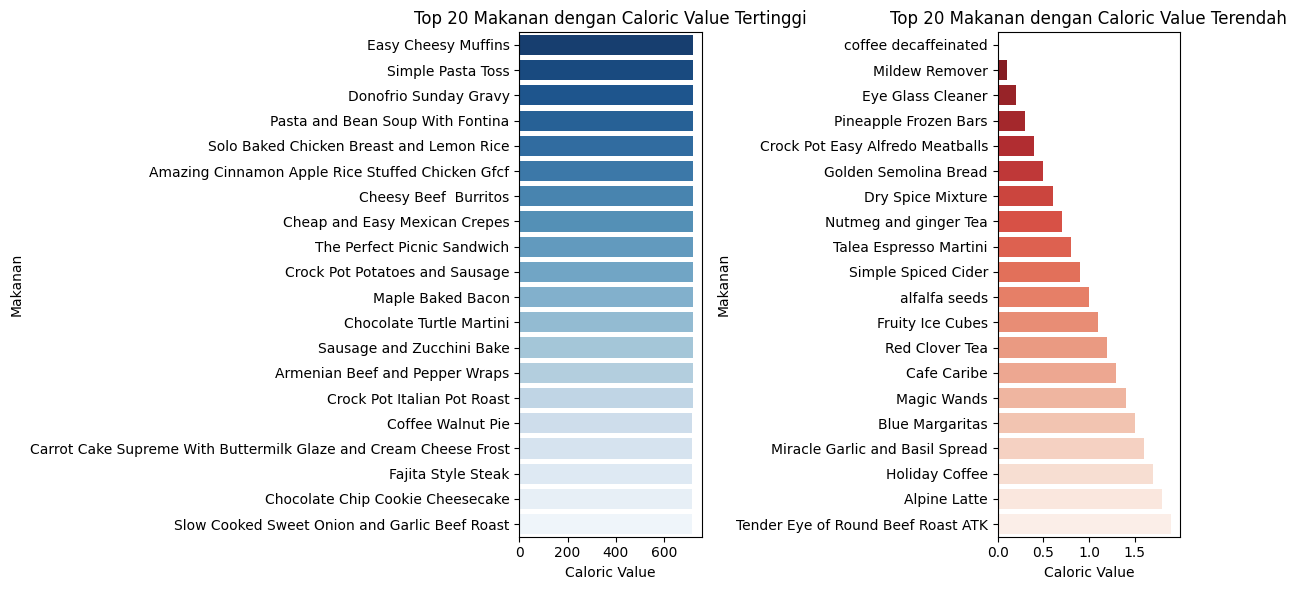

Visualisasi untuk Fat:


<ipython-input-47-00ecbf989b46>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=data_high, x=column, y="food", palette="Blues_r")
<ipython-input-47-00ecbf989b46>:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=data_low, x=column, y="food", palette="Reds_r")


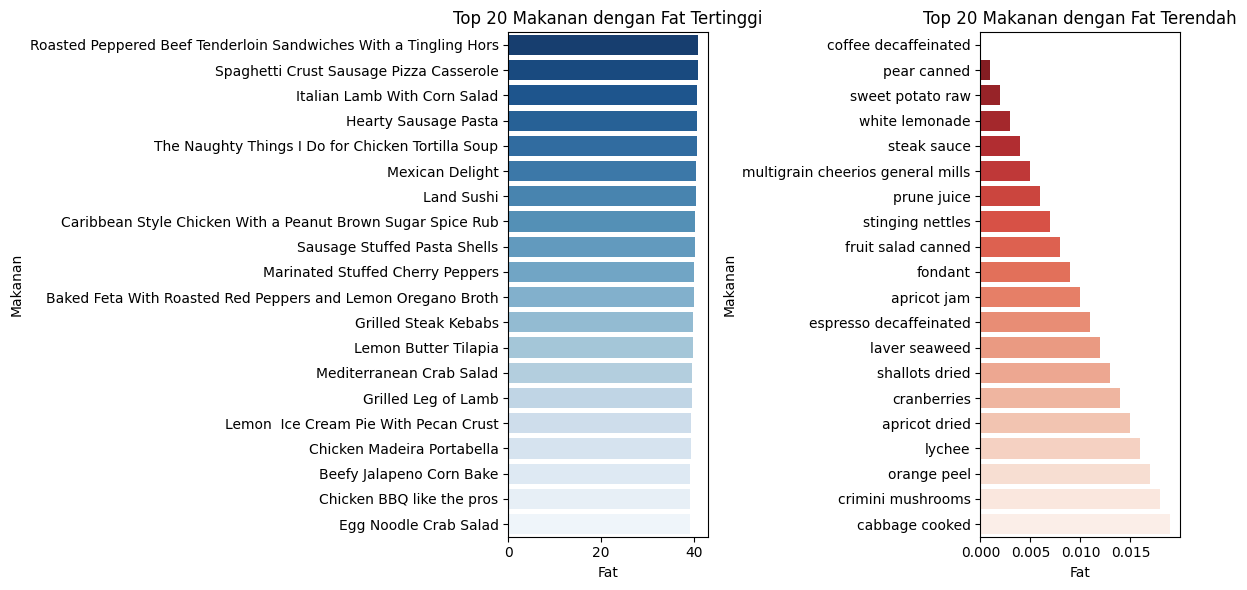

Visualisasi untuk Saturated Fats:


<ipython-input-47-00ecbf989b46>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=data_high, x=column, y="food", palette="Blues_r")
<ipython-input-47-00ecbf989b46>:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=data_low, x=column, y="food", palette="Reds_r")


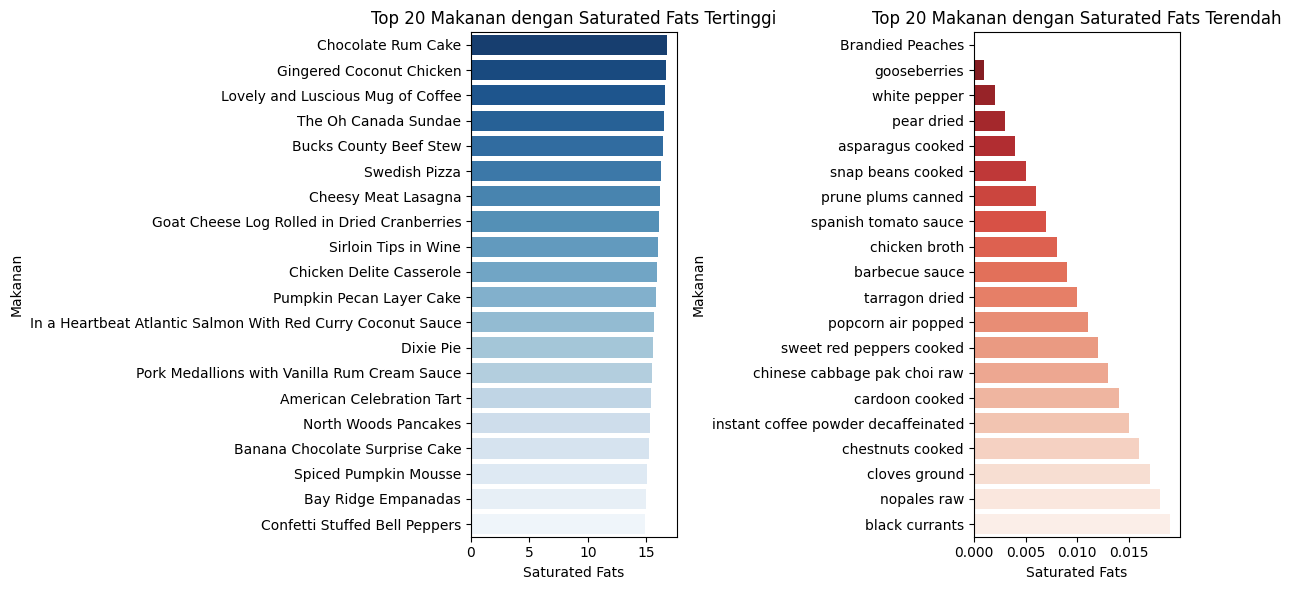

Visualisasi untuk Carbohydrates:


<ipython-input-47-00ecbf989b46>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=data_high, x=column, y="food", palette="Blues_r")
<ipython-input-47-00ecbf989b46>:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=data_low, x=column, y="food", palette="Reds_r")


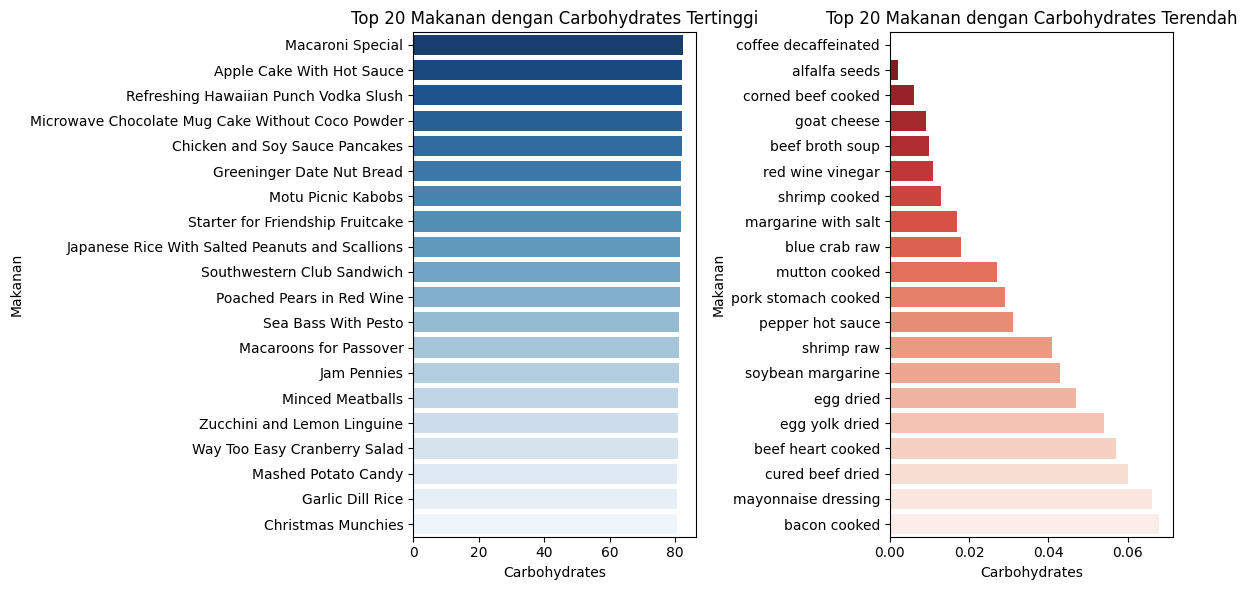

Visualisasi untuk Protein:


<ipython-input-47-00ecbf989b46>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=data_high, x=column, y="food", palette="Blues_r")
<ipython-input-47-00ecbf989b46>:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=data_low, x=column, y="food", palette="Reds_r")


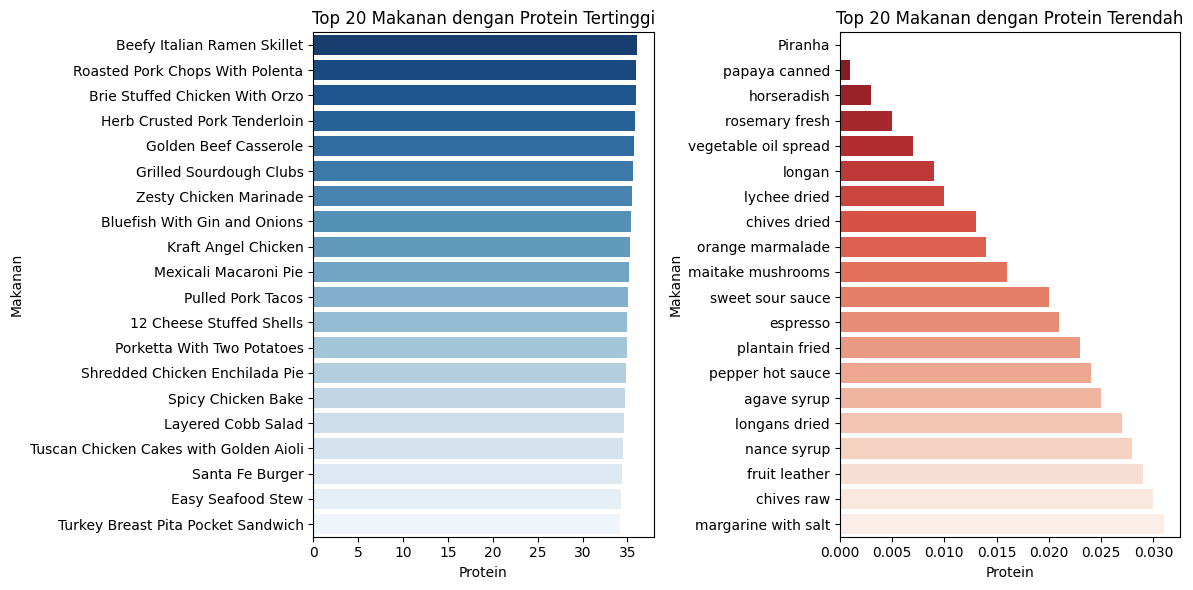

Visualisasi untuk Dietary Fiber:


<ipython-input-47-00ecbf989b46>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=data_high, x=column, y="food", palette="Blues_r")
<ipython-input-47-00ecbf989b46>:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=data_low, x=column, y="food", palette="Reds_r")


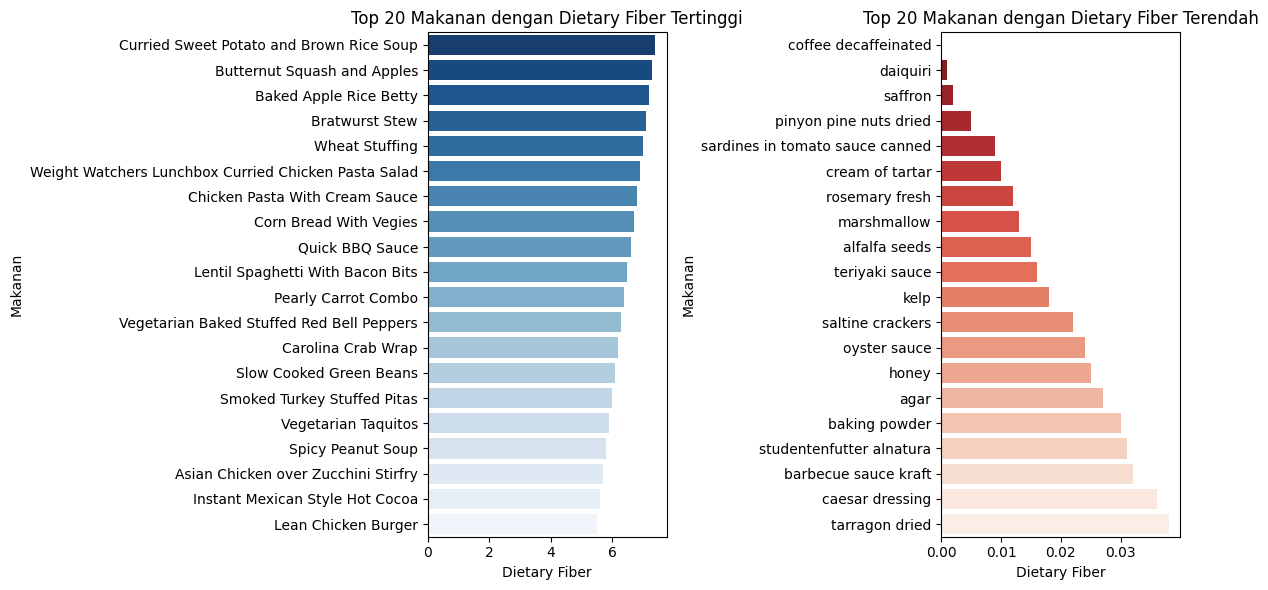

Visualisasi untuk Cholesterol:


<ipython-input-47-00ecbf989b46>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=data_high, x=column, y="food", palette="Blues_r")
<ipython-input-47-00ecbf989b46>:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=data_low, x=column, y="food", palette="Reds_r")


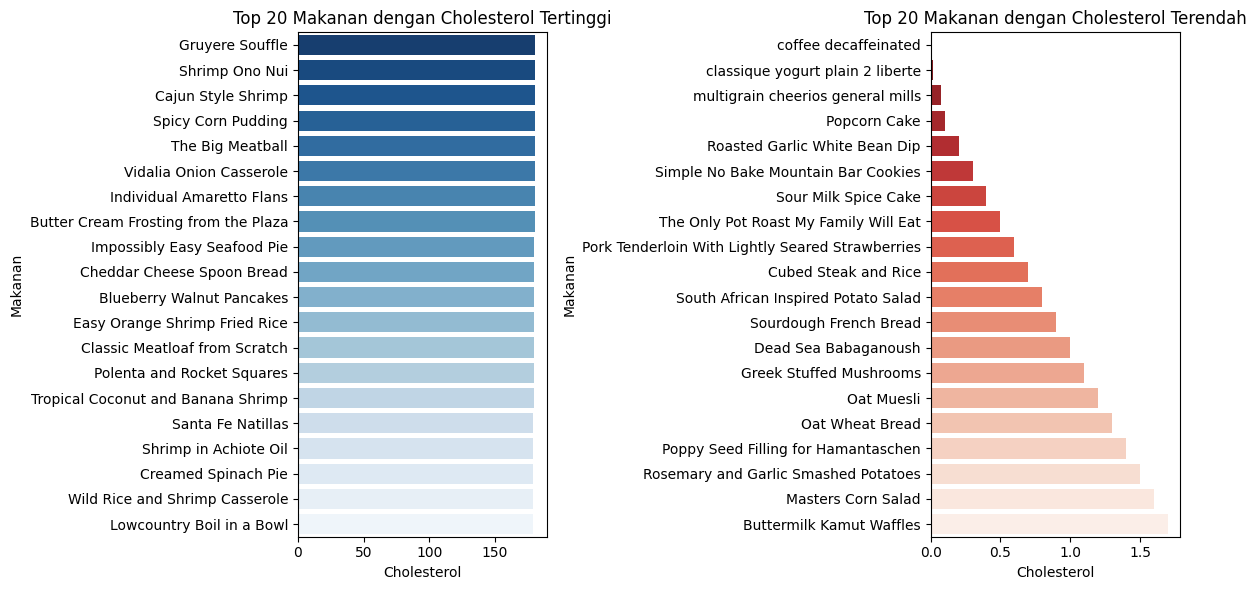

In [ ]:
# Fungsi untuk membuat bar chart untuk top 5 tertinggi dan terendah
def plot_top_nutrient(data_high, data_low, column):
    # Set ukuran plot
    plt.figure(figsize=(12, 6))

    # Bar chart untuk top 20 makanan dengan nutrisi tertinggi
    plt.subplot(1, 2, 1)  # 1 baris, 2 kolom, grafik 1
    sns.barplot(data=data_high, x=column, y="food", palette="Blues_r")
    plt.title(f"Top 20 Makanan dengan {column} Tertinggi")
    plt.xlabel(column)
    plt.ylabel("Makanan")

    # Bar chart untuk top 20 makanan dengan nutrisi terendah
    plt.subplot(1, 2, 2)  # 1 baris, 2 kolom, grafik 2
    sns.barplot(data=data_low, x=column, y="food", palette="Reds_r")
    plt.title(f"Top 20 Makanan dengan {column} Terendah")
    plt.xlabel(column)
    plt.ylabel("Makanan")

    # Tampilkan plot
    plt.tight_layout()
    plt.show()

# Plot untuk semua kolom nutrisi
for column in columns_to_plot:
    print(f"Visualisasi untuk {column}:")
    plot_top_nutrient(top_highest[column], top_lowest[column], column)

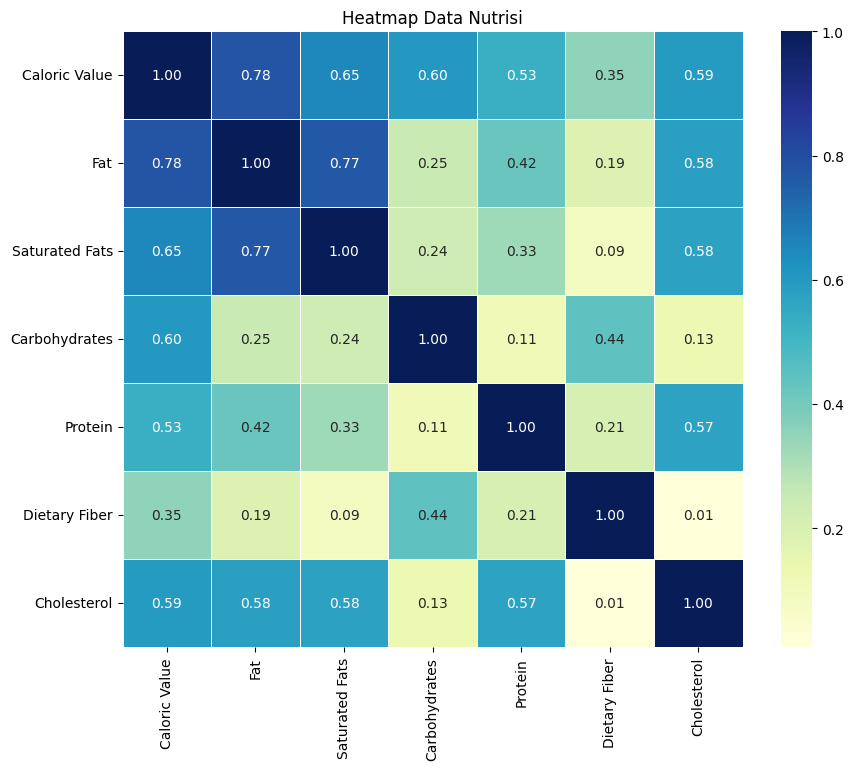

In [ ]:
correlation_matrix = df[['Caloric Value', 'Fat', 'Saturated Fats', 'Carbohydrates', 'Protein', 'Dietary Fiber', 'Cholesterol']].corr()

# Membuat heatmap untuk menampilkan korelasi antar nutrisi
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="YlGnBu", fmt=".2f", linewidths=0.5)
plt.title("Heatmap Data Nutrisi")
plt.show()

Korelasi antara Saturated Fats dan Cholesterol: 0.5756739540595611


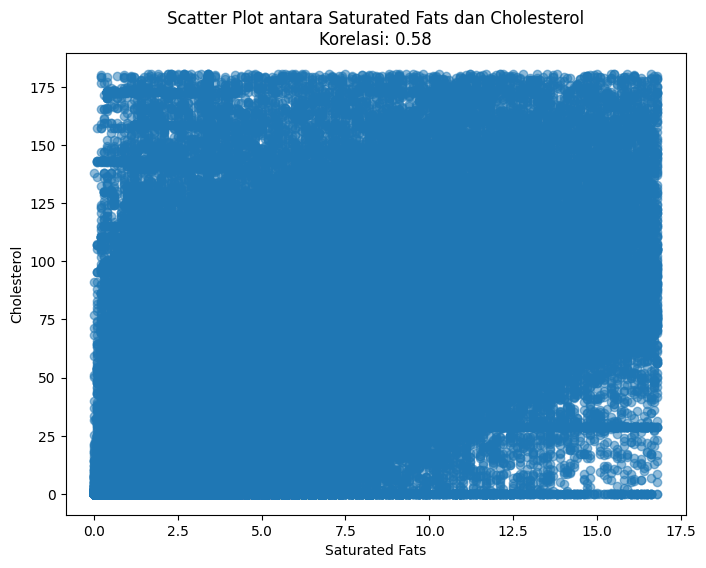

In [ ]:
# Korelasi antara Saturated Fats dan Cholesterol
correlation_sf_chol = df['Saturated Fats'].corr(df['Cholesterol'])
print(f"Korelasi antara Saturated Fats dan Cholesterol: {correlation_sf_chol}")

# Visualisasi korelasi
plt.figure(figsize=(8, 6))
sns.regplot(x='Saturated Fats', y='Cholesterol', data=df, scatter_kws={'alpha':0.5})
plt.title(f'Scatter Plot antara Saturated Fats dan Cholesterol\nKorelasi: {correlation_sf_chol:.2f}')
plt.xlabel('Saturated Fats')
plt.ylabel('Cholesterol')
plt.show()

# ini normal kah bentuk scatter plotnya gini?Y_Y

Korelasi antara Dietary Fiber dan Cholesterol: 0.00807191502253626


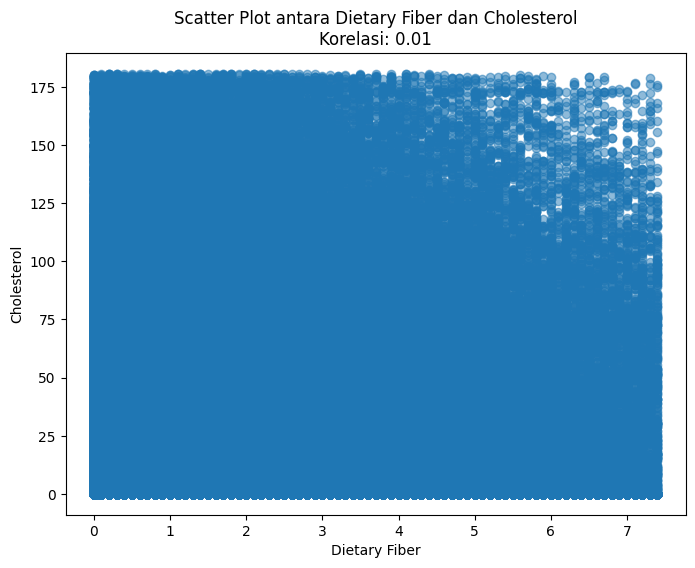

In [ ]:
# Korelasi antara Dietary Fiber dan Cholesterol
correlation_fiber_chol = df['Dietary Fiber'].corr(df['Cholesterol'])
print(f"Korelasi antara Dietary Fiber dan Cholesterol: {correlation_fiber_chol}")

# Visualisasi korelasi
plt.figure(figsize=(8, 6))
sns.regplot(x='Dietary Fiber', y='Cholesterol', data=df, scatter_kws={'alpha':0.5})
plt.title(f'Scatter Plot antara Dietary Fiber dan Cholesterol\nKorelasi: {correlation_fiber_chol:.2f}')
plt.xlabel('Dietary Fiber')
plt.ylabel('Cholesterol')
plt.show()

Korelasi antara Fat dan Saturated Fats: 0.7702520245666105


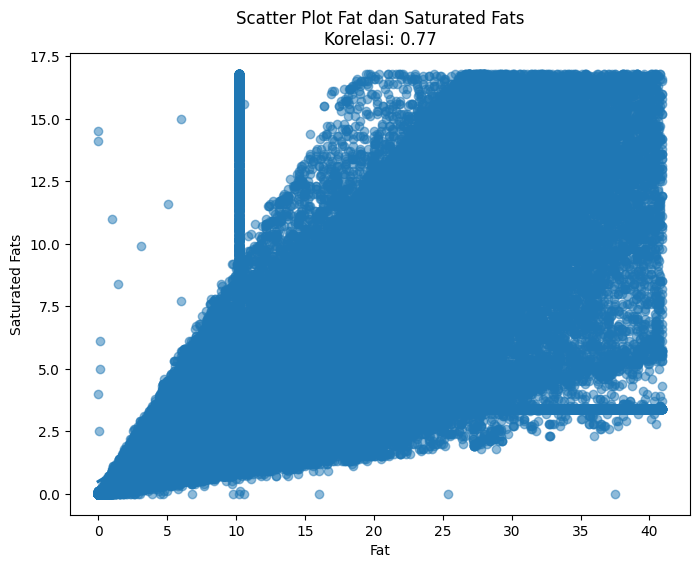

In [ ]:
# Korelasi antara Fat dan Saturated Fats
correlation_fiber_chol = df['Fat'].corr(df['Saturated Fats'])
print(f"Korelasi antara Fat dan Saturated Fats: {correlation_fiber_chol}")

# Visualisasi korelasi
plt.figure(figsize=(8, 6))
sns.regplot(x='Fat', y='Saturated Fats', data=df, scatter_kws={'alpha':0.5})
plt.title(f'Scatter Plot Fat dan Saturated Fats\nKorelasi: {correlation_fiber_chol:.2f}')
plt.xlabel('Fat')
plt.ylabel('Saturated Fats')
plt.show()

In [ ]:
# Makanan tinggi saturated fat dan rendah cholesterol

high_saturatedfat_low_cholesterol = df.sort_values(by='Saturated Fats', ascending=False).head(5)[["food", 'Saturated Fats', 'Cholesterol']]
high_saturatedfat_low_cholesterol  = high_saturatedfat_low_cholesterol .sort_values(by='Saturated Fats', ascending=True).head(5)[["food", 'Saturated Fats', 'Cholesterol']]
high_saturatedfat_low_cholesterol

,food,Saturated Fats,Cholesterol
205655,Chocolate Rum Cake,16.8,104.6
197283,Sweet Potato Lasagna,16.8,70.5
214890,Belgian Christmas Cookies,16.8,149.7
191055,Almond Cheesecake With Amaretti Crust,16.8,175.2
209934,Stomppot Zuurkool,16.8,90.5


In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Caloric Value,212820.0,253.166449,155.233339,0.0,129.9,230.8,354.4,719.6
Fat,212820.0,11.711967,9.588705,0.0,4.0,9.7,17.6,40.9
Saturated Fats,212820.0,4.363276,4.119684,0.0,1.0,3.2,6.7,16.8
Carbohydrates,212820.0,25.405176,18.908431,0.0,10.1,21.9,37.0,82.4
Protein,212820.0,9.099215,9.276875,0.0,2.4,5.7,12.7,36.1
Dietary Fiber,212820.0,2.072791,1.790283,0.0,0.6,1.6,3.1,7.4
Cholesterol,212820.0,41.434843,44.399011,0.0,0.9,26.9,69.7,180.7


In [ ]:
df.to_csv('datamakanan.csv', index=False)